Análise de crescimentos/quedas YTD

In [1]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#lendo os arquivos
vendas_2020 = pd.read_excel('Base Vendas - 2020.xlsx')
vendas_2021 = pd.read_excel('Base Vendas - 2021.xlsx')
vendas_2022 = pd.read_excel('Base Vendas - 2022.xlsx')

In [7]:
#adiconando nos dataframes a coluna ano
vendas_2020['Ano'] = 2020
vendas_2021['Ano'] = 2021
vendas_2022['Ano'] = 2022

In [8]:
#unificando os dataframes
df_vendas = pd.concat([vendas_2020, vendas_2021, vendas_2022], ignore_index=True)

In [9]:
#formatando a coluna data
df_vendas['Data da Venda'] = pd.to_datetime(df_vendas['Data da Venda'])

In [10]:
#extraindo o mês
df_vendas['Mes'] = df_vendas['Data da Venda'].dt.month

In [11]:
#agrupando por ano e mês, e somando a quantidade vendida
df_agg = df_vendas.groupby(['Ano', 'Mes'])['Qtd Vendida'].sum().reset_index()

In [12]:
#calculando o acumulado YTD
df_agg['YTD_Vendas'] = df_agg.groupby('Ano')['Qtd Vendida'].cumsum()

In [13]:
#pivotando para comparar os anos
df_pivot = df_agg.pivot(index='Mes', columns='Ano', values='YTD_Vendas')

In [14]:
#calculando variação percentual entre os dois últimos anos
anos_disponiveis = sorted(df_pivot.columns)
ano_atual = anos_disponiveis[-1]
ano_anterior = anos_disponiveis[-2]

In [15]:
df_pivot['Variação (%)'] = ((df_pivot[ano_atual] - df_pivot[ano_anterior]) / df_pivot[ano_anterior]) * 100

In [16]:
#exibindo os maiores crescimentos e quedas
maior_crescimento = df_pivot['Variação (%)'].idxmax()
maior_queda = df_pivot['Variação (%)'].idxmin()

In [17]:
print(f"📈 Maior crescimento YTD: mês {maior_crescimento} com {df_pivot['Variação (%)'].max():.2f}%")
print(f"📉 Maior queda YTD: mês {maior_queda} com {df_pivot['Variação (%)'].min():.2f}%")

📈 Maior crescimento YTD: mês 1 com 2800.83%
📉 Maior queda YTD: mês 6 com 2556.15%


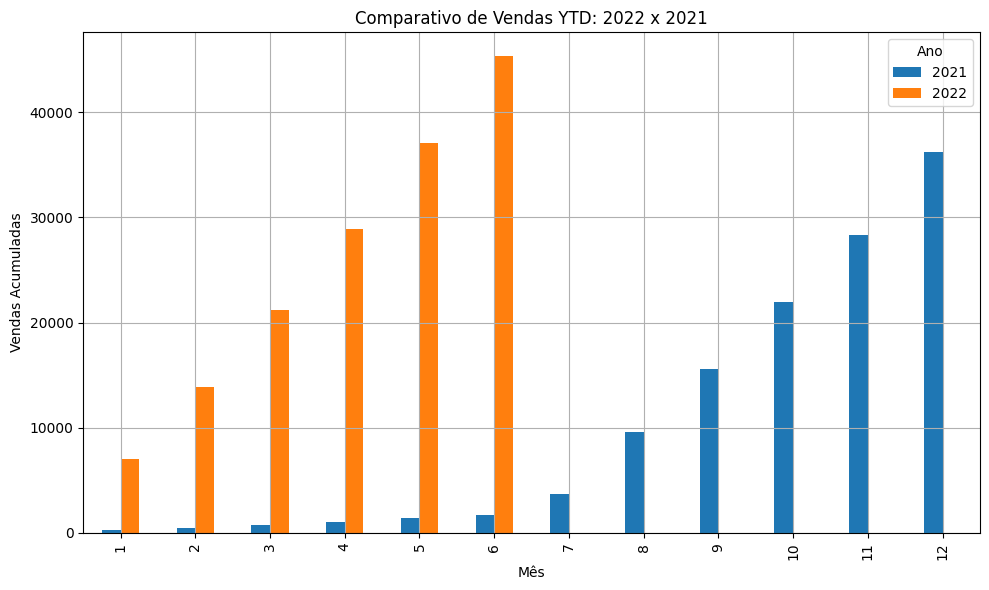

In [18]:
#gráfico comparativo
df_pivot[[ano_anterior, ano_atual]].plot(kind='bar', figsize=(10, 6))
plt.title(f'Comparativo de Vendas YTD: {ano_atual} x {ano_anterior}')
plt.xlabel('Mês')
plt.ylabel('Vendas Acumuladas')
plt.grid(True)
plt.tight_layout()
plt.show()

Projeção de tendência próximo Ano

In [19]:
#base para projeção: ano mais recente
base_proj = df_agg[df_agg['Ano'] == ano_atual].copy()
base_proj['Ano'] = ano_atual + 1

In [20]:
#recalculando o acumulado YTD para o ano projetado
base_proj['YTD_Vendas'] = base_proj['Qtd Vendida'].cumsum()

In [21]:
#juntando com os dados originais
df_proj = pd.concat([df_agg, base_proj], ignore_index=True)

In [22]:
#pivotando
df_proj_pivot = df_proj.pivot(index='Mes', columns='Ano', values='YTD_Vendas')

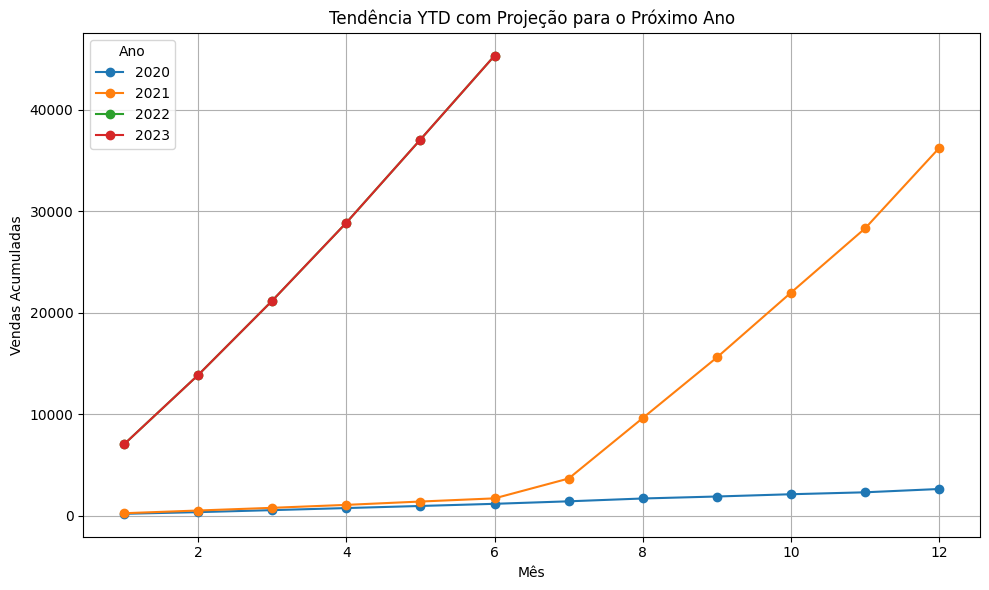

In [23]:
#gráfico de tendência com projeção
df_proj_pivot.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Tendência YTD com Projeção para o Próximo Ano')
plt.xlabel('Mês')
plt.ylabel('Vendas Acumuladas')
plt.grid(True)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()